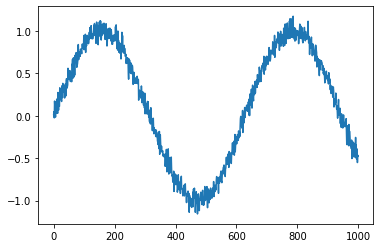

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

T = 1000

time = np.arange(0,T)
fn = np.sin(time/100)

noise = np.random.randn(len(time))/15
fn = fn+noise

plt.plot(time, fn)
plt.show()

In [63]:
def prep_data_old(_tau):
    tau = _tau
    data = np.zeros((time.shape[0]-tau, tau))
    for a in range(len(time)-tau):
        data[a] = fn[a:a+tau]
    y = data[:,-1]
    X = data[:,:-1]

    split = len(X)//5
    X_train, X_test =  X[split:], X[:split]
    y_train, y_test = y[split:], y[:split]

    return X_train, X_test, y_train, y_test

In [76]:
def get_model():
    model = keras.Sequential()
    model.add(layers.Embedding(input_dim=X_train.shape[1], output_dim=4))
    model.add(layers.LSTM(128, return_sequences=True))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1))
    opt = tf.keras.optimizers.Adam(.1)
    model.compile(optimizer=opt, loss='mse', metrics=['mse', 'mae'])
    return model

get_model().summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 4)           80        
_________________________________________________________________
lstm_8 (LSTM)                (None, None, 128)         68096     
_________________________________________________________________
dense_29 (Dense)             (None, None, 10)          1290      
_________________________________________________________________
dense_30 (Dense)             (None, None, 1)           11        
Total params: 69,477
Trainable params: 69,477
Non-trainable params: 0
_________________________________________________________________


In [77]:
X_train, X_test, y_train, y_test = prep_data(20)
model = get_model()
model.fit(X_train, y_train, epochs=2, batch_size=16, verbose=0)
model.evaluate(X_test, y_test)
plt.plot(y_train, label='truth')
plt.plot(model.predict(X_train), label='predict')
#plt.title(f'tau: {taus}')
plt.legend()
plt.show()

InvalidArgumentError:  indices[1,10] = -1 is not in [0, 20)
	 [[node sequential_16/embedding_8/embedding_lookup (defined at <ipython-input-77-876b87007377>:3) ]] [Op:__inference_train_function_22347]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_16/embedding_8/embedding_lookup:
 sequential_16/embedding_8/embedding_lookup/21347 (defined at /Users/anthony.nolan/opt/miniconda3/lib/python3.8/contextlib.py:113)

Function call stack:
train_function


In [59]:
def prep_data(_tau):
    tau = _tau
    data = np.zeros((time.shape[0]-tau, tau*2))
    for a in range(len(time)-tau):
        data[a] = np.append(fn[a:a+tau], fn[a+1:a+tau+1])
        
    y = data[:,-tau:]
    X = data[:,:-tau]

    split = len(X)//5
    X_train, X_test =  X[split:], X[:split]
    y_train, y_test = y[split:], y[:split]

    return X_train, X_test, y_train, y_test